## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from conv_learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [2]:
bs=64; sz=64
f_model = resnet34
path = "/data/jhoward/fast/dogscats/"

In [3]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data_full = ImageClassifierData.from_paths(path, bs, tfms, test_name='test1')

In [4]:
data = data_full.resize(128, 'tmp') if sz<=90 else data_full

In [5]:
learn = ConvLearner.pretrained(f_model, data, ps=0.2)

In [6]:
learn.use_fc=True

In [8]:
lrf=learn.lr_find()

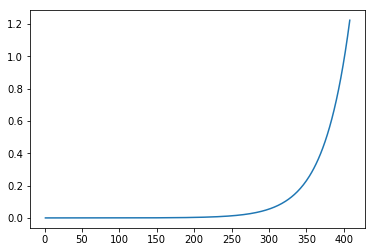

In [28]:
learn.sched.plot_lr()

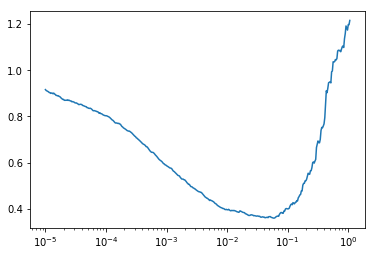

In [29]:
learn.sched.plot()

In [11]:
learn.fit(1e-2, 2)

[ 0.262551  0.220772  0.907227]


[ 0.266497  0.218121  0.907715]



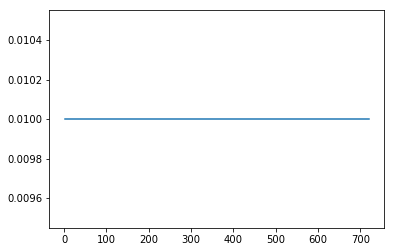

In [12]:
learn.sched.plot_lr()

In [9]:
learn.use_fc=False

In [10]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

[ 0.271504  0.222649  0.903809]


[ 0.260793  0.215804  0.904297]


[ 0.250736  0.215356  0.905762]


[ 0.267865  0.222703  0.902344]


[ 0.249062  0.215333  0.90918 ]


[ 0.248731  0.212052  0.907227]


[ 0.231687  0.212215  0.910645]



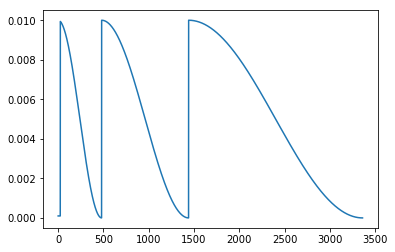

In [13]:
learn.sched.plot_lr()

In [55]:
learn.save('64_fc')

In [14]:
learn.freeze_to(6)

In [16]:
learn.fit(1e-2, 2, cycle_len=1)

[ 0.217319  0.189142  0.925781]


[ 0.193144  0.1753    0.932129]



In [17]:
lr=np.array([1e-3,3e-3,1e-2])

In [18]:
learn.unfreeze()

In [19]:
learn.fit(lr, 1)

[ 0.148264  0.154828  0.938965]



In [49]:
learn.load('64_fc')

While copying the parameter named 0.weight, whose dimensions in the model are torch.Size([64, 3, 7, 7]) and whose dimensions in the checkpoint are torch.Size([1024]), ...


RuntimeError: invalid argument 2: sizes do not match at /opt/conda/conda-bld/pytorch_1502009910772/work/torch/lib/THC/THCTensorCopy.cu:31

In [20]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

[ 0.116215  0.13539   0.947266]


[ 0.10946   0.126467  0.952637]


[ 0.087374  0.124935  0.950195]


[ 0.100757  0.128663  0.947754]


[ 0.080435  0.117748  0.955566]


[ 0.070501  0.1243    0.954102]


[ 0.063755  0.119421  0.958984]



In [21]:
accuracy(*learn.TTA())

0.96699999999999997

### 299x299

In [22]:
sz=299

In [25]:
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, bs, tfms, test_name='test1')

In [35]:
learn = ConvLearner.pretrained(f_model, data)

In [36]:
learn.use_fc=True

In [37]:
learn.fit(1e-2, 2, cycle_len=1)

[ 0.051696  0.027327  0.992188]


[ 0.043387  0.026378  0.992676]



In [38]:
learn.use_fc=False

In [39]:
learn.fit(1e-2, 1, cycle_len=1)

[ 0.046682  0.027648  0.992676]



In [41]:
accuracy(*learn.TTA())

0.99350000000000005

In [42]:
learn.save('299_fc_no')

In [43]:
lr=np.array([1e-4,1e-3,1e-2])

In [44]:
learn.unfreeze()

In [45]:
learn.fit(lr, 6, cycle_len=2)

[ 0.03788   0.022553  0.990723]


[ 0.037363  0.021855  0.993164]


[ 0.034454  0.019455  0.991699]


[ 0.021646  0.018575  0.992188]


[ 0.024885  0.019954  0.993164]


[ 0.021888  0.019285  0.993652]


[ 0.019471  0.018638  0.994141]


[ 0.020537  0.018037  0.994141]


[ 0.015746  0.020099  0.992676]


[ 0.011484  0.019977  0.993164]


KeyboardInterrupt: 

Process Process-371:
Traceback (most recent call last):
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jhoward/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/queues.py", line 342, in get
    res = self._reader.recv_bytes()
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/jhoward/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
Proc

In [ ]:
accuracy(learn.TTA(), data.val_y)

In [ ]:
learn.save('299_no')

In [ ]:
learn.fit(lr/5, 4, cycle_len=2)

In [ ]:
accuracy(learn.TTA(), data.val_y)

## End

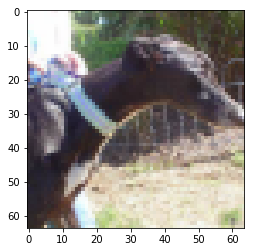

In [56]:
tfm=Transforms(64, [Scale(64)], rand_crop=True)
data = ClassifierData.from_paths(data.path, 2, (tfm, tfm))
x,y=next(iter(ds.val_dl))
plt.imshow(np.rollaxis(x[0].numpy(),0,3));

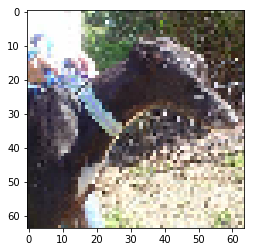

In [15]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64), interpolation=cv2.INTER_NEAREST));

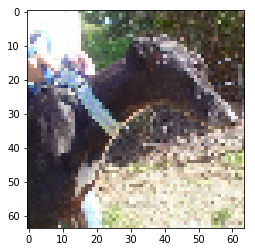

In [12]:
im=PIL.Image.open(data_full.path+'/'+data_full.val_dl.dataset.fnames[0])
plt.imshow(cv2.resize(np.array(im), (64,64)));